# Drawing random samples


### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas 
import seaborn as sns
sns.set_theme()

### Load and plot the data

We will work with a distinctly non-normal data distribution - the scores for a large num of individuals on a 100-item political questionairre called BrexDex. 

The questions are designed and scored so that a high score overall score on the questionairre indicates an attitude in favour of Brexit, and a low score indicates an attitude against brexit.

Because the scores relate to a polarizing topic, the data distribution is bimodal

(These are made up data by the way!)

First load the data:

In [1]:
UKBrexdex=pandas.read_csv('data/nonNormalData2.txt')
UKBrexdex

NameError: name 'pandas' is not defined

We can see that the dataset contains 10,000 individuals' scores on the BrexDex questionnaire. 

Let's plot them to get a sense of the distribution:

Text(0, 0.5, 'frequency')

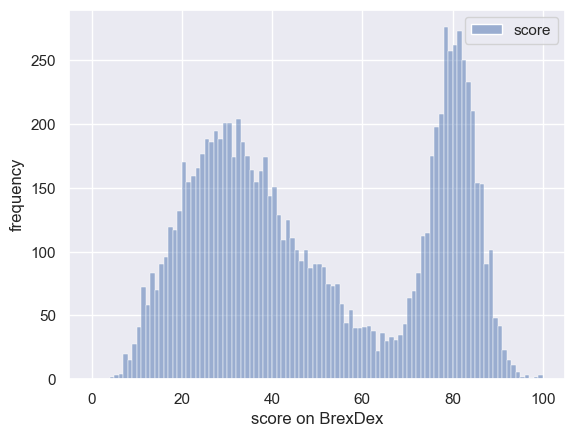

In [43]:
sns.histplot(UKBrexdex, bins=range(101))
plt.xlabel('score on BrexDex')
plt.ylabel('frequency')

Obviously, 10,000 is a very large sample (perhaps a national sample). We might be interested giving the questionnarie to a smaller group (say, 100 first year studens in Oxford) to see if their attitutdes were similar to the larger national sample.

What kind of distribution of responses would we expect to get in a sample of 100?

### The sample distriution resembles the parent distriution

If the Oxford first years have attitudes typical of the national sample, we can simulate what their data might look like by drawing a random sample of 100 from our national dataset.

We can do this using the tool <tt>numpy.random.choice</tt> which makes a random selection of datapoints from a larger dataset:

In [44]:
sample = np.random.choice(UKBrexdex['score'], 100, replace=False)
print(sample)

[76 23 32 81 77 17 62 18 35 65 77 75 78 80 45 29 24 22 15 53 47 56 51 35
 21 42 83 15 84 48 44 35 18 37 63 71 50 53 43 31 73 80 30 37 32 23 19 88
 39 37 39 81 79 50 40 77 89 62 35 14 31 15 23 33 78 84 24 41 17 18 83 34
 39 84 77 33 44 78 59 34 33 40 30 78 83 82 78 21 37 76 21 52  9 24 83 10
 29 76 30 32]


Let's plot the data and compare to our national sample:

Text(0.5, 0, 'Score on Brexdex (%)')

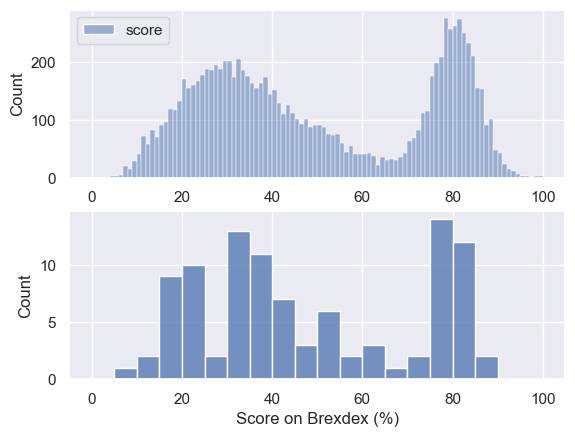

In [50]:
plt.subplot(2,1,1)
sns.histplot(UKBrexdex, bins=range(101))
plt.subplot(2,1,2)
sns.histplot(sample, bins=range(0,101,5)) # use wider bins for the sample as there are fewer datapoints
plt.xlabel('Score on Brexdex (%)')

Hopefully we can see that the distribution within the sample resemblbes the distribution in the national sample

Let's draw a few more random samples, each time of size 100, to check this:

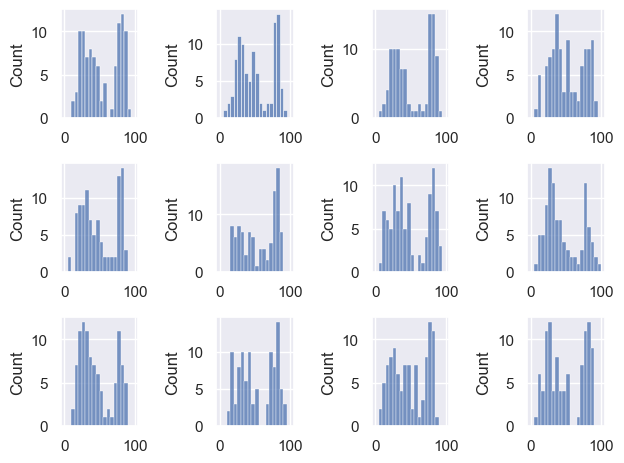

In [54]:
for i in range(1,13):
    sample = np.random.choice(UKBrexdex['score'], 100, replace=False)
    plt.subplot(3,4,i)
    sns.histplot(sample, bins=range(0,101,5)) # use wider bins for the sample as there are fewer datapoints   
    plt.tight_layout() # automatically adjust subbplot spacing to accomodate axis labels

Notice that we always manage to reproduce the bimodal shape, albeit with random variability. 

The distribution within each sample resembles the parent distribution from which it is drawn, ie the UK national sample.

# The sampling distribution of the mean

The mean Brexdex score can be obtained from the UK national sample as follows:

In [55]:
UKBrexdex.mean()

score    49.8748
dtype: float64

The mean score in the national sample is 49.9%.

Given that each of our smaller samples (with $n=100$) resemble the parent distribution, we might expect that the mean of each of these samples approximates the mean of the UK national sample.

Let's try drawing a large number of random samples with $n=100$, and getting the mean of each one:

In [57]:
nSamples = 10000 # we will draw 10,000 samples
n=100 # each sample contains n people

m=np.empty(nSamples) # make an array to store the means

for i in range(nSamples):
    sample = np.random.choice(UKBrexdex['score'], 100, replace=False)
    m[i]=sample.mean()

Let's plot the resulting means:

In [ ]:
sns.his